In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# For Jupyter Notebook plotting
%matplotlib inline

# import datasets

In [ ]:
Hosp_d=pd.read_csv('Hospitalisation details.csv')
Med_d=pd.read_csv('Medical Examinations.csv')
name_d=pd.read_excel('Names.xlsx')

**Hospital Data**

In [ ]:
print("Hospital_Data")
print(Hosp_d.head(12))
print("Medical_Data")
print(Med_d.head(12))
print("Name_Data")
print(name_d.head(12))

Hospital_Data
   Customer ID  year month  date  children  charges Hospital tier City tier  \
0       Id2335  1992   Jul     9         0   563.84      tier - 2  tier - 3   
1       Id2334  1992   Nov    30         0   570.62      tier - 2  tier - 1   
2       Id2333  1993   Jun    30         0   600.00      tier - 2  tier - 1   
3       Id2332  1992   Sep    13         0   604.54      tier - 3  tier - 3   
4       Id2331  1998   Jul    27         0   637.26      tier - 3  tier - 3   
5       Id2330  2001   Nov    20         0   646.14      tier - 3  tier - 3   
6       Id2329  1993   Jun     1         0   650.00      tier - 3  tier - 3   
7       Id2328  1995   Jul     4         0   650.00      tier - 3  tier - 3   
8       Id2327  2002   Nov    29         0   668.00      tier - 3  tier - 2   
9       Id2326  1997   Nov     9         0   670.00      tier - 3  tier - 3   
10      Id2325  2001   Sep    12         0   687.54      tier - 3  tier - 2   
11      Id2324  1999   Dec    26      

In [ ]:
Hosp_d.describe()

,date,children,charges
count,2343.000000,2343.000000,2343.000000
mean,15.554844,1.026035,13559.067870
std,8.721194,1.233847,11922.658415
min,1.000000,0.000000,563.840000
25%,8.000000,0.000000,5084.010000
50%,15.000000,0.000000,9634.540000
75%,23.000000,2.000000,17029.675000
max,30.000000,5.000000,63770.430000


In [ ]:
Med_d.describe()

,BMI,HBA1C
count,2335.000000,2335.000000
mean,30.972649,6.578998
std,8.742095,2.228731
min,15.010000,4.000000
25%,24.600000,4.900000
50%,30.400000,5.810000
75%,36.300000,7.955000
max,55.050000,12.000000


In [ ]:
Hosp_d.info()
Hosp_d.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2343 non-null   object 
 1   year           2343 non-null   object 
 2   month          2343 non-null   object 
 3   date           2343 non-null   int64  
 4   children       2343 non-null   int64  
 5   charges        2343 non-null   float64
 6   Hospital tier  2343 non-null   object 
 7   City tier      2343 non-null   object 
 8   State ID       2343 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 164.9+ KB


(2343, 9)

In [ ]:
Med_d.info()
Med_d.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   BMI                     2335 non-null   float64
 2   HBA1C                   2335 non-null   float64
 3   Heart Issues            2335 non-null   object 
 4   Any Transplants         2335 non-null   object 
 5   Cancer history          2335 non-null   object 
 6   NumberOfMajorSurgeries  2335 non-null   object 
 7   smoker                  2335 non-null   object 
dtypes: float64(2), object(6)
memory usage: 146.1+ KB


(2335, 8)

In [ ]:
name_d.info()
name_d.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  2335 non-null   object
 1   name         2335 non-null   object
dtypes: object(2)
memory usage: 36.6+ KB


(2335, 2)

In [ ]:
# print("Hospital Data", Hosp_d.info)
# print("Medical_Data",Med_d.shape)
# print("Name_Data",name_d.shape)
Hosp_d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2343 non-null   object 
 1   year           2343 non-null   object 
 2   month          2343 non-null   object 
 3   date           2343 non-null   int64  
 4   children       2343 non-null   int64  
 5   charges        2343 non-null   float64
 6   Hospital tier  2343 non-null   object 
 7   City tier      2343 non-null   object 
 8   State ID       2343 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 164.9+ KB


## **Merge Data:** Merge All data by Customer ID

In [ ]:
Name_Hosp_d=pd.merge(name_d, Hosp_d,on='Customer ID')
Name_Hosp_d.head(2)

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013


In [ ]:
df=pd.merge(Name_Hosp_d, Med_d,on='Customer ID')
df.head()

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,"Lu, Mr. Phil",1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes
3,Id4,"Osborne, Ms. Kelsey",1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,"Kadala, Ms. Kristyn",1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   name                    2335 non-null   object 
 2   year                    2335 non-null   object 
 3   month                   2335 non-null   object 
 4   date                    2335 non-null   int64  
 5   children                2335 non-null   int64  
 6   charges                 2335 non-null   float64
 7   Hospital tier           2335 non-null   object 
 8   City tier               2335 non-null   object 
 9   State ID                2335 non-null   object 
 10  BMI                     2335 non-null   float64
 11  HBA1C                   2335 non-null   float64
 12  Heart Issues            2335 non-null   object 
 13  Any Transplants         2335 non-null   object 
 14  Cancer history          2335 non-null   

(2335, 17)

In [ ]:
df[df.eq('?').any(axis=1)]


,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
2,Id3,"Lu, Mr. Phil",1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes
169,Id170,"Torphy, Mr. Bobby",2000,Sep,5,1,37165.16,tier - 1,tier - 3,?,37.620,6.32,yes,yes,No,2,yes
559,Id560,"Pearlman, Mr. Oz",1994,Jul,1,3,17663.14,tier - 1,tier - 3,R1013,23.980,4.90,No,No,No,No major surgery,?
634,Id635,"Bruns, Mr. Zachary T",2004,Jul,17,0,15518.18,tier - 2,tier - 3,R1015,25.175,4.96,No,yes,No,1,?
1285,Id1286,"Ainsley, Ms. Katie M.",?,Dec,12,1,8547.69,tier - 2,tier - 1,R1013,29.370,8.01,yes,No,No,1,No
1288,Id1289,"Levine, Ms. Annie J.",?,Jul,24,0,8534.67,tier - 2,tier - 3,R1024,24.320,11.56,yes,No,No,1,No
1792,Id1793,"Capriolo, Mr. Michael",1995,Dec,1,3,4827.90,tier - 1,tier - 2,?,18.905,4.91,yes,No,No,1,No
2317,Id2318,"Gagnon, Ms. Candice M",1996,?,18,0,770.38,tier - 3,?,R1012,18.820,5.51,yes,No,No,No major surgery,No
2321,Id2322,"Street, Ms. Holly",2002,?,19,0,750.00,tier - 3,tier - 1,R1012,21.380,8.01,No,No,No,No major surgery,No
2323,Id2324,"Duffy, Ms. Meghan K",1999,Dec,26,0,700.00,?,tier - 3,R1013,22.240,5.04,No,No,No,No major surgery,No


In [ ]:
len(df[df.eq('?').any(axis=1)])/len(df)*100

0.4282655246252677

**Missing value Handling:** Since value is only 0.43% so we can drop it instead of filling

In [ ]:
df.replace("?", np.nan, inplace=True)

**Categorical Transformations**

Convert Hospital tier, City tier into ordinal/numeric.

Convert Yes/No into 1/0.

In [ ]:
df['Hospital tier'] = df['Hospital tier'].map({'tier - 1':1, 'tier - 2':2, 'tier - 3':3})
df['City tier'] = df['City tier'].map({'tier - 1':1, 'tier - 2':2, 'tier - 3':3})
df.replace({'yes':1, 'No':0}, inplace=True)


/tmp/ipython-input-1966705734.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes':1, 'No':0}, inplace=True)


State ID Dummies (only R1011, R1012, R1013)

In [ ]:
df['State_dummy'] = df['State ID'].apply(lambda x: x if x in ['R1011','R1012','R1013'] else 'Other')
df = pd.get_dummies(df, columns=['State_dummy'], drop_first=True)


**Clean Number Of Major Surgeries**

Convert "No major surgery" to 0 (int).

In [ ]:
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].replace("No major surgery", 0).astype(int)


**Age Calculation**

In [ ]:
import datetime
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['year'].astype(float)


# **Gender from Name**

Detect from salutations (Mr. = Male, Ms./Mrs. = Female

In [ ]:
df['Gender'] = df['name'].apply(lambda x: 'Male' if 'Mr.' in x else 'Female')


# **Cost Distribution Visualizations**

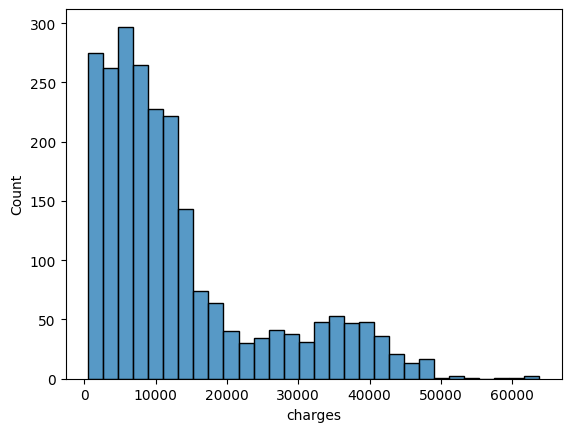

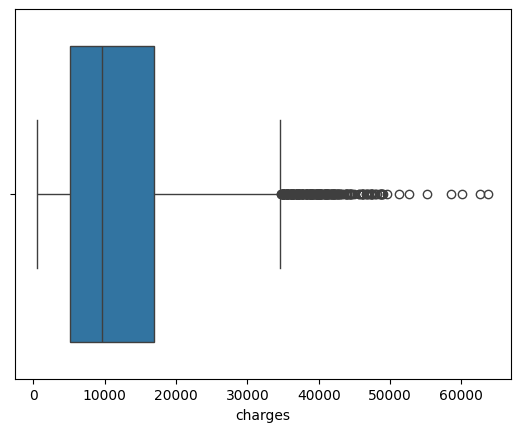

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 40.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


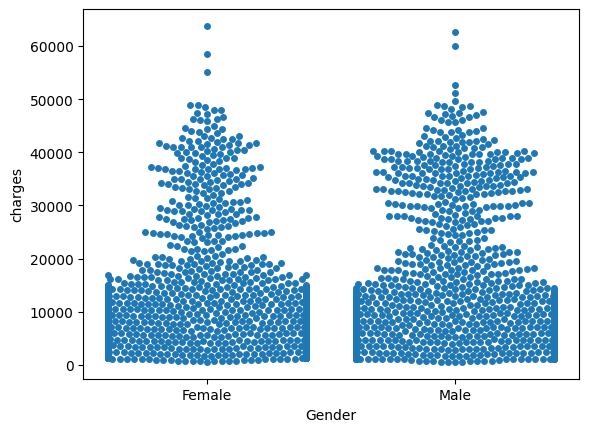

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'], bins=30)
plt.show()

sns.boxplot(x=df['charges'])
plt.show()

sns.swarmplot(x="Gender", y="charges", data=df)
plt.show()


**Distribution across Gender & Hospital Tiers**

<Axes: xlabel='Gender', ylabel='charges'>

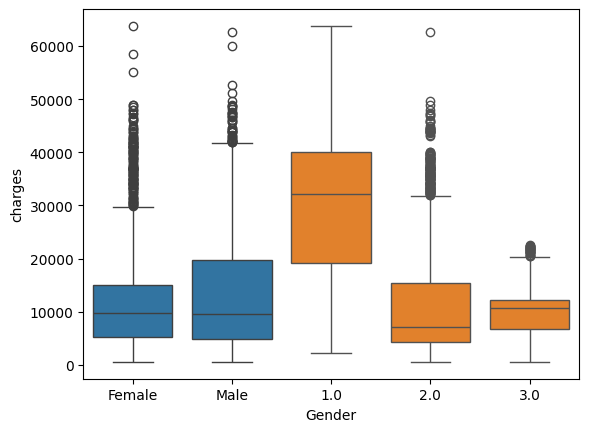

In [ ]:
sns.boxplot(x="Gender", y="charges", data=df)
sns.boxplot(x="Hospital tier", y="charges", data=df)


# **Radar Chart (Median Cost by Hospital Tier)**

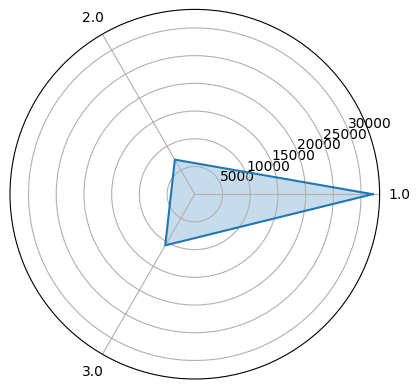

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

median_costs = df.groupby('Hospital tier')['charges'].median()
labels = median_costs.index.astype(str)
values = median_costs.values

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
values = np.concatenate((values,[values[0]]))
angles = np.concatenate((angles,[angles[0]]))

plt.polar(angles, values)
plt.fill(angles, values, alpha=0.25)
plt.xticks(angles[:-1], labels)
plt.show()


# **Frequency Table & Stacked Bar Chart**

Hospital tier  1.0  2.0  3.0
City tier                   
1.0             86  404  242
2.0            107  479  222
3.0            111  454  228


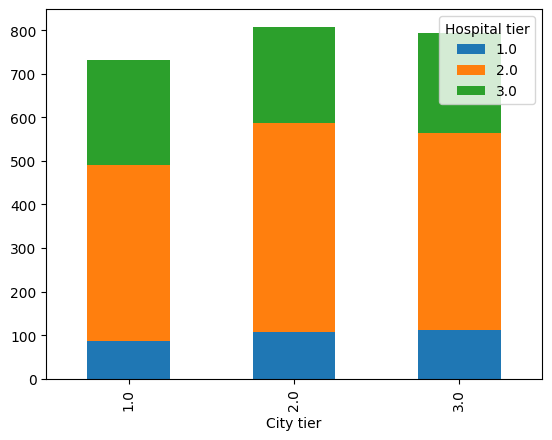

In [ ]:
freq_table = pd.crosstab(df['City tier'], df['Hospital tier'])
print(freq_table)

freq_table.plot(kind="bar", stacked=True)
plt.show()


# **Hypothesis Testing**
**Using t-test / ANOVA / Chi-square:**

In [ ]:
from scipy import stats
import pandas as pd

# a. Hospital tiers vs charges (ANOVA)
anova_hospital = stats.f_oneway(*(df[df['Hospital tier']==t]['charges'] for t in df['Hospital tier'].unique()))

# b. City tiers vs charges (ANOVA)
anova_city = stats.f_oneway(*(df[df['City tier']==t]['charges'] for t in df['City tier'].unique()))

# c. Smokers vs Non-smokers (t-test)
ttest_smoker = stats.ttest_ind(df[df['smoker']==1]['charges'], df[df['smoker']==0]['charges'])

# d. Smoking vs Heart Issues (Chi-square)
contingency = pd.crosstab(df['smoker'], df['Heart Issues'])
chi2_test = stats.chi2_contingency(contingency)

# ---- Print outputs neatly ----
print("\n=== Hypothesis Test Results ===\n")

print("a) Hospital tiers vs charges (ANOVA):")
print(anova_hospital, "\n")

print("b) City tiers vs charges (ANOVA):")
print(anova_city, "\n")

print("c) Smokers vs Non-smokers (t-test):")
print(ttest_smoker, "\n")

print("d) Smoking vs Heart Issues (Chi-square):")
print("Chi2:", chi2_test[0], " | p-value:", chi2_test[1], " | dof:", chi2_test[2])
print("Expected frequencies:\n", chi2_test[3], "\n")



=== Hypothesis Test Results ===

a) Hospital tiers vs charges (ANOVA):
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan)) 

b) City tiers vs charges (ANOVA):
F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan)) 

c) Smokers vs Non-smokers (t-test):
TtestResult(statistic=np.float64(74.30910384417501), pvalue=np.float64(0.0), df=np.float64(2331.0)) 

d) Smoking vs Heart Issues (Chi-square):
Chi2: 0.05210493727554302  | p-value: 0.8194401862037882  | dof: 1
Expected frequencies:
 [[1112.69395628  732.30604372]
 [ 294.30604372  193.69395628]] 



/tmp/ipython-input-1825185118.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_hospital = stats.f_oneway(*(df[df['Hospital tier']==t]['charges'] for t in df['Hospital tier'].unique()))
/tmp/ipython-input-1825185118.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_city = stats.f_oneway(*(df[df['City tier']==t]['charges'] for t in df['City tier'].unique()))
